In [1]:
from functions import Dataset, import_data, outlayer, rysuj_boxplot, checkbox_outlayer, zakres_lat, wybor_lat, prognozy

from wykresy import kolizje_miesiac, kolizje_rok_dzien, kolizje_doba
from symulacje import srednia_miesiac, testSrednich_bootstrap

import ipywidgets as widgets
from IPython.display import display
import pandas as pd
from testy import dwie_srednie

In [2]:
print(Dataset())

Nasza aplikacja z kolizjami jest w trakcie budowy


### Pobranie danych

In [3]:
df = import_data(Dataset.kolizje)

Wyciągnięcie danych chwilę trwa, zrelaksuj się i czekaj na komunikat o zakończeniu


/home/mac/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Gotowe - możesz robić analizy


In [4]:
df_prognozy = prognozy(df)

### Czy chcesz robić analizę z outlayer'ami?

In [5]:
wybor = checkbox_outlayer(pytanie='Uwzględnić obserwacje odstające?')
wybor

Checkbox(value=False, description='Uwzględnić obserwacje odstające?', indent=False)

In [6]:
df = outlayer(wybor.value, df)

Wybrałeś analizę na danych BEZ obserwacji odstających


### Wybierz zakres lat do analizy

In [7]:
lata = wybor_lat(pytanie='Zakres lat')
lata

IntRangeSlider(value=(2004, 2020), description='Zakres lat', max=2020, min=2004)

In [8]:
df = zakres_lat(lata.value, df)

Wybrałeś lata pomiędzy 2004, a 2020


### Wybierz kolumnę po której chcesz grupować oraz cechę którą chcesz badać na wkyresie skrynkowym

In [9]:
grupowanie = widgets.Dropdown(
             options=['RANNI', 'POWAŻNIE_RANNI', 'ŚMIERTELNIE_RANNI'],
             value='RANNI',
             description='Grupuj: ')
grupowanie

Dropdown(description='Grupuj: ', options=('RANNI', 'POWAŻNIE_RANNI', 'ŚMIERTELNIE_RANNI'), value='RANNI')

In [10]:
cecha = widgets.Dropdown(
        options=df.columns,
        value='KIERUNEK_SZCZEGOLY',
        description='Cecha:')
cecha

Dropdown(description='Cecha:', index=26, options=('DLUGOSC', 'SZEROKOSC', 'DOTKLIWOSC_KOLIZJI', 'TYP_KOLIZJI',…

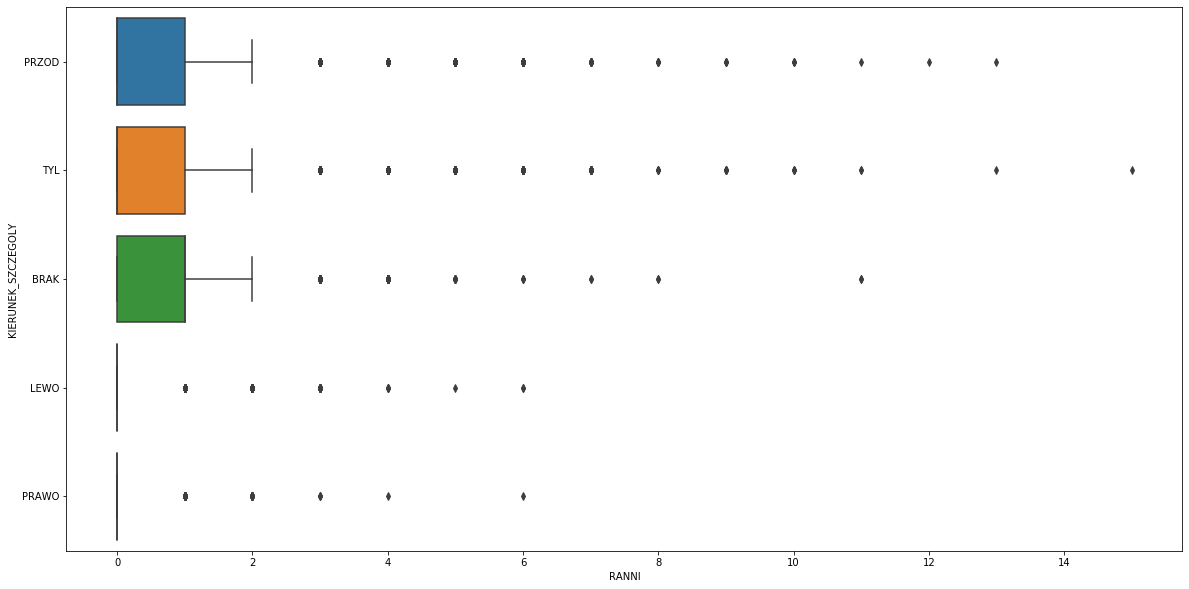

In [11]:
rysuj_boxplot(df, grupowanie.value, cecha.value)

### Test średnich

In [12]:
dwie_srednie(dane=df, cecha='ROK', grupa1 = 2007, grupa2 = 2017, wartosc='ŚMIERTELNIE_RANNI', alpha=0.01, obszar='lewy')

Odrzucamy hipotezę zerową na rzecz alternatywnej 
U=-2.5676601367132945<=-2.3263478740408408=u_alpha 
m1=0.0010331340860453102
m2=0.0027037466203167246 
p_value=0.0051193742872632595


### Wykres ilości kolizji na miesiąc

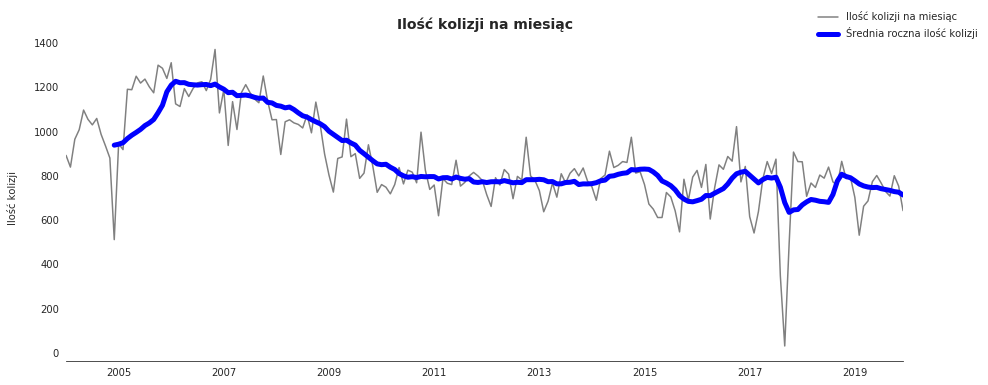

In [13]:
kolizje_miesiac(df_prognozy)

### Diagram kolizji w danym roku i dniu tygodnia

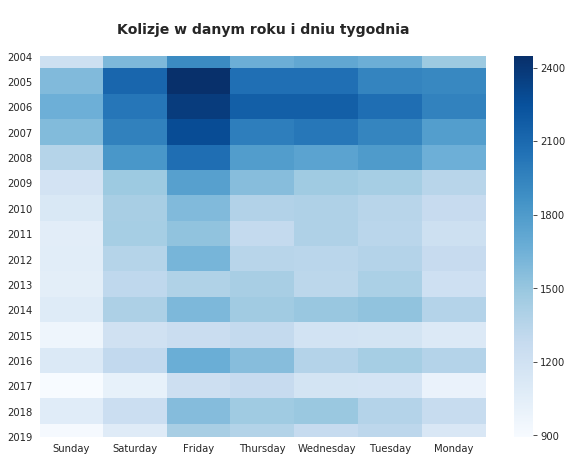

In [14]:
kolizje_rok_dzien(df_prognozy)

### Wykres kolizji w ciągu doby

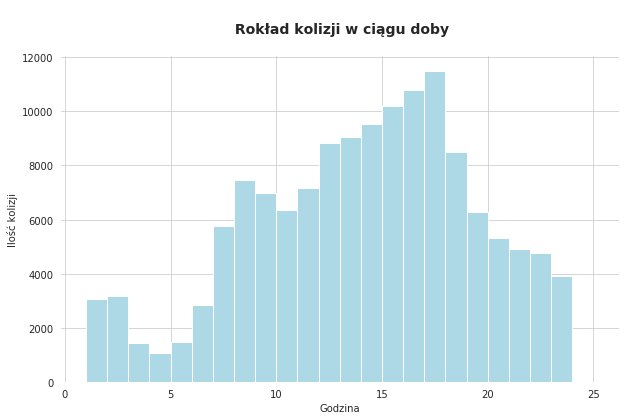

In [15]:
kolizje_doba(df_prognozy)

### Porównanie średnich ilości kolizji w danych miesiącach.
### Wykorzystanie symulacji Monte Carlo do zwiększenia wiarygodności testu statystycznego.

In [16]:
srednia_miesiac(df_prognozy)

,OBJECTID
MIESIAC,
1,27.566532
2,26.533186
3,27.542339
4,28.387500
5,29.455645
6,30.537500
7,29.193548
8,28.486708
9,28.208955


In [17]:
testSrednich_bootstrap(df_prognozy, nr_miesiacaA = 6, nr_miesiacaB = 7, n=1000, alpha=0.05)

p-value=0.02286 jest mniejsza niż poziom istotności 0.05.
Hipotezę zerową należy odrzucić na rzecz hipotezy alternatywnej: średnie nie są równe.
Wynik testu istotny w 63.3% symulacji.
